<a href="https://colab.research.google.com/github/SreedeviRKrishnan/FDP_ASIET_DLforCV/blob/main/Fdp_flower_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [3]:
os.chdir('/content/drive/MyDrive/ASIET_FDP')

In [5]:
pwd

'/content/drive/MyDrive/ASIET_FDP'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [6]:
import glob
import PIL 
from PIL import Image

In [8]:
!unzip '/content/drive/MyDrive/ASIET_FDP/Flower_dataset.zip' -d /content/drive/MyDrive/ASIET_FDP/Flower_dataset/
#extract dataset from drive and import into pwd /content/drive/MyDrive/ASIET_FDP

Archive:  /content/drive/MyDrive/ASIET_FDP/Flower_dataset.zip
   creating: /content/drive/MyDrive/ASIET_FDP/Flower_dataset/tiny_FR/
   creating: /content/drive/MyDrive/ASIET_FDP/Flower_dataset/tiny_FR/daisy/
  inflating: /content/drive/MyDrive/ASIET_FDP/Flower_dataset/tiny_FR/daisy/100080576_f52e8ee070_n.jpg  
  inflating: /content/drive/MyDrive/ASIET_FDP/Flower_dataset/tiny_FR/daisy/102841525_bd6628ae3c.jpg  
  inflating: /content/drive/MyDrive/ASIET_FDP/Flower_dataset/tiny_FR/daisy/1031799732_e7f4008c03.jpg  
  inflating: /content/drive/MyDrive/ASIET_FDP/Flower_dataset/tiny_FR/daisy/105806915_a9c13e2106_n.jpg  
  inflating: /content/drive/MyDrive/ASIET_FDP/Flower_dataset/tiny_FR/daisy/107592979_aaa9cdfe78_m.jpg  
  inflating: /content/drive/MyDrive/ASIET_FDP/Flower_dataset/tiny_FR/daisy/1140299375_3aa7024466.jpg  
  inflating: /content/drive/MyDrive/ASIET_FDP/Flower_dataset/tiny_FR/daisy/1150395827_6f94a5c6e4_n.jpg  
  inflating: /content/drive/MyDrive/ASIET_FDP/Flower_dataset/tiny_F

In [9]:
imgFiles=glob.glob("/content/drive/MyDrive/ASIET_FDP/Flower_dataset/tiny_FR/*/*.jpg")

#open all (*) from tiny_FR from given path and all jpg files

In [10]:
for items in imgFiles[:8]: # pick 0 to 7 images from imgFiles
  print(items)

/content/drive/MyDrive/ASIET_FDP/Flower_dataset/tiny_FR/daisy/100080576_f52e8ee070_n.jpg
/content/drive/MyDrive/ASIET_FDP/Flower_dataset/tiny_FR/daisy/102841525_bd6628ae3c.jpg
/content/drive/MyDrive/ASIET_FDP/Flower_dataset/tiny_FR/daisy/1031799732_e7f4008c03.jpg
/content/drive/MyDrive/ASIET_FDP/Flower_dataset/tiny_FR/daisy/105806915_a9c13e2106_n.jpg
/content/drive/MyDrive/ASIET_FDP/Flower_dataset/tiny_FR/daisy/107592979_aaa9cdfe78_m.jpg
/content/drive/MyDrive/ASIET_FDP/Flower_dataset/tiny_FR/daisy/1140299375_3aa7024466.jpg
/content/drive/MyDrive/ASIET_FDP/Flower_dataset/tiny_FR/daisy/1150395827_6f94a5c6e4_n.jpg
/content/drive/MyDrive/ASIET_FDP/Flower_dataset/tiny_FR/daisy/11642632_1e7627a2cc.jpg


In [11]:
print(len(imgFiles))

# each floder has 100 images. so 5*100=500 images

500


In [12]:
x=[] # ip img list
y=[] #op label list

In [13]:
for fName in imgFiles:

  x_i=Image.open(fName) #contents of flower dats set
  x_i=x_i.resize((299,299))
  x_i=np.array(x_i)/255. # normalise to 0.0 to 1.0

  x.append(x_i)
  label=fName.split("/") # "",content, drive, mydrive, asiet_fdp, flower dataset, tiny_fr, category name of flower , file name
  y_i=label[7]
  y.append(y_i)




In [14]:
print(y)


['daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandeli

In [ ]:
len(y)

In [15]:
print(set(y)) #list uniques values in list

{'sunflower', 'tulip', 'dandelion', 'rose', 'daisy'}


 convert to numerical value

In [16]:
from sklearn.preprocessing import LabelEncoder
lEncoder=LabelEncoder() #convert into numerical value
y=lEncoder.fit_transform(y)
print(y)
print(set(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [17]:
len(y)

500

In [18]:
print(lEncoder.classes_)
# to know numeric value and label ie 0 daisy, 1 dandelion

['daisy' 'dandelion' 'rose' 'sunflower' 'tulip']


In [19]:
x=np.array(x)
y=np.array(y)

print(x.shape)
print(y.shape)

(500, 299, 299, 3)
(500,)


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42) #stratified splitting
print("x_train_shape:{}".format(x_train.shape))
print("x_test_shape:{}".format(x_train.shape))

x_train_shape:(400, 299, 299, 3)
x_test_shape:(400, 299, 299, 3)


In [21]:
#manual std scale the data
mu=x_train.mean()
std=x_train.std()
x_train_std=(x_train-mu)/std
x_test_std=(x_test-mu)/std

In [22]:
print(x_train.shape)
print(x_train.shape[0])
print(x_train.shape[-2])
print(x_train.shape[1:])


(400, 299, 299, 3)
400
299
(299, 299, 3)


In [28]:
# Create the network using Functional API metho
input_ = keras.layers.Input(shape = x_train.shape[1:])
# Construct the convolution based preprocessing part (feature extractor) 
x = keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu')(input_)
x = keras.layers.MaxPool2D(pool_size=2)(x)

x = keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)

# Construct the DNN classifier part

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(units=1000, activation='relu')(x)
x = keras.layers.Dense(units=100, activation='relu')(x)
output_ = keras.layers.Dense(units=5, activation='softmax')(x)

model_CNN = keras.models.Model(inputs=[input_], outputs=[output_])


In [29]:
model_CNN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 299, 299, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 350464)            0     

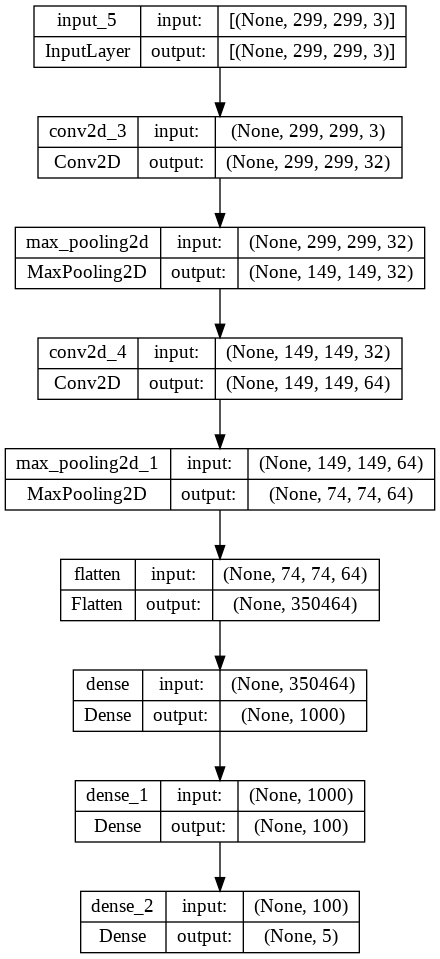

In [30]:
tf.keras.utils.plot_model(
    model_CNN,
    to_file='model_CNN.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

In [32]:
# Compile the network with appropriate settings for loss, optimizer and metrics.
model_CNN.compile(loss='sparse_categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

#Training the model. 
history_CNN = model_CNN.fit(x=x_train_std, 
                            y=y_train, 
                            epochs=25, 
                            validation_split=0.1, 
                            batch_size=32)

#history_cnn (dictionary) captures the loss and accuracy in ech epoch and stores 

Epoch 1/25
12/12 [==============================] - 12s 219ms/step - loss: 24.2795 - accuracy: 0.2556 - val_loss: 1.5454 - val_accuracy: 0.2000
Epoch 2/25
12/12 [==============================] - 2s 167ms/step - loss: 1.4469 - accuracy: 0.4528 - val_loss: 1.3826 - val_accuracy: 0.4750
Epoch 3/25
12/12 [==============================] - 2s 166ms/step - loss: 1.2474 - accuracy: 0.4806 - val_loss: 1.3047 - val_accuracy: 0.4000
Epoch 4/25
12/12 [==============================] - 2s 165ms/step - loss: 1.0985 - accuracy: 0.6389 - val_loss: 1.3399 - val_accuracy: 0.4250
Epoch 5/25
12/12 [==============================] - 2s 166ms/step - loss: 0.9158 - accuracy: 0.6611 - val_loss: 1.5309 - val_accuracy: 0.4000
Epoch 6/25
12/12 [==============================] - 2s 167ms/step - loss: 0.6672 - accuracy: 0.7917 - val_loss: 1.4126 - val_accuracy: 0.4000
Epoch 7/25
12/12 [==============================] - 2s 167ms/step - loss: 0.4988 - accuracy: 0.8083 - val_loss: 1.9625 - val_accuracy: 0.4250
Epoc

In [33]:
history_CNN.history.items()

dict_items([('loss', [24.279495239257812, 1.4468753337860107, 1.247438907623291, 1.0984703302383423, 0.9157626628875732, 0.6672322154045105, 0.4987950325012207, 0.34556064009666443, 0.43260908126831055, 0.28136417269706726, 0.1309182494878769, 0.03215800225734711, 0.008568042889237404, 0.0035316769499331713, 0.0016370771918445826, 0.0006937299040146172, 0.000487016630358994, 0.0003903783508576453, 0.00032308619120158255, 0.00027312577003613114, 0.0002432159089948982, 0.0002186629135394469, 0.00019702795543707907, 0.00017894565826281905, 0.0001643187424633652]), ('accuracy', [0.25555557012557983, 0.45277777314186096, 0.48055556416511536, 0.6388888955116272, 0.6611111164093018, 0.7916666865348816, 0.8083333373069763, 0.8916666507720947, 0.8833333253860474, 0.9361110925674438, 0.9638888835906982, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]), ('val_loss', [1.5454084873199463, 1.3826252222061157, 1.304684042930603, 1.3398678302764893, 1.5308887958526611, 1.41260349

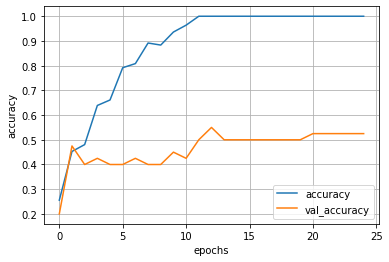

In [34]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_CNN.history.items() if k in keys} #returns the training accuracy and validation accuracy as two separate lists,
                                                                      #attached with the keys in a dictionary format 

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

# since trining 1 and validation .5 its overfitting

#Evaluate model

In [36]:
# Pass the appropriate arguments for evaluate function.
test_loss, test_accuracy = model_CNN.evaluate(x_test_std, y_test)

print("Test-loss: %f, Test-accuracy: %f" % (test_loss,  test_accuracy))

4/4 [==============================] - 0s 88ms/step - loss: 3.3374 - accuracy: 0.5000
Test-loss: 3.337422, Test-accuracy: 0.500000


In [38]:
cProba = model_CNN.predict(x_test_std[:10])

print(cProba)

1/1 [==============================] - 0s 306ms/step
[[9.9787140e-01 2.5163515e-04 2.3052614e-04 1.6327885e-03 1.3674676e-05]
 [7.0571017e-01 4.2655684e-02 2.5014889e-01 1.3518907e-04 1.3500806e-03]
 [1.5040303e-15 7.1708359e-16 5.5913675e-01 2.9387988e-09 4.4086322e-01]
 [3.7985720e-04 1.1458526e-01 7.0379531e-01 2.5487354e-04 1.8098474e-01]
 [5.2704800e-02 8.2911432e-01 1.9524755e-02 9.3543030e-02 5.1130988e-03]
 [3.6772035e-04 2.9421628e-02 5.3409371e-04 9.6853620e-01 1.1403398e-03]
 [7.6377197e-05 5.2034187e-01 4.9798604e-04 4.6927449e-01 9.8093757e-03]
 [2.4412736e-07 4.2244696e-06 7.3586714e-01 2.5639251e-08 2.6412839e-01]
 [4.2097006e-02 2.5583202e-01 9.7351052e-02 4.3661058e-01 1.6810931e-01]
 [2.8187465e-05 4.1492190e-02 2.1523012e-02 6.2134408e-04 9.3633527e-01]]


In [39]:
cLabel = np.argmax(cProba,axis=-1) 

print(cLabel)

[0 0 2 2 1 3 1 2 3 4]


In [40]:
print(y_test[:10])

[2 3 2 0 0 3 1 2 3 4]
